# Regression metrics:

1.Mean absolute error:
sum of all(abs(y-y_predicted))/n
-> although robust to outliers cannot be used to apply optimisation techniques.

2.Mean squared error:
sum of all squares of (y-y_predicted)/n
-> not robust to outliers -> more weight when squared

3.RMSE(root mean squared error):
root of sum of all outliers ....
-> also not robust to outliers


# R2 score:

-> how better the fit is compared to the mean.

-> also called as goodness of fit, coeff. of determination.

->R_2 =  1-SSR/SSM

SSR-> sum of squared error of regression line.

SSM-> sum of sqaured error of mean value line.


**doubt need to learn more..**

 Adjusted_R2_score:

sometimes cols with irrelevant features could explain the proportionality with the result.

R^2= 1-[(1-R2)(N-1)/(n-1-k)]

![Screenshot 2024-06-21 155830.png](<attachment:Screenshot 2024-06-21 155830.png>) ![Screenshot 2024-06-21 155838.png](<attachment:Screenshot 2024-06-21 155838.png>) ![Screenshot 2024-06-21 155817.png](<attachment:Screenshot 2024-06-21 155817.png>)

intercept is updated by->

i = i-learning_rate*(y-h(theta))
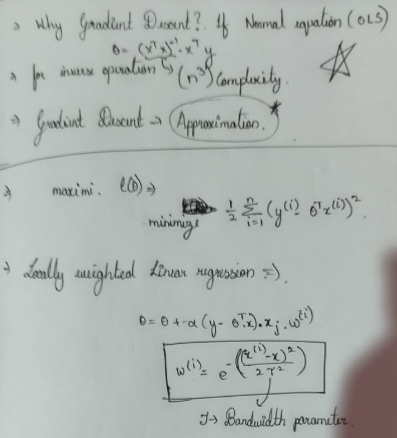
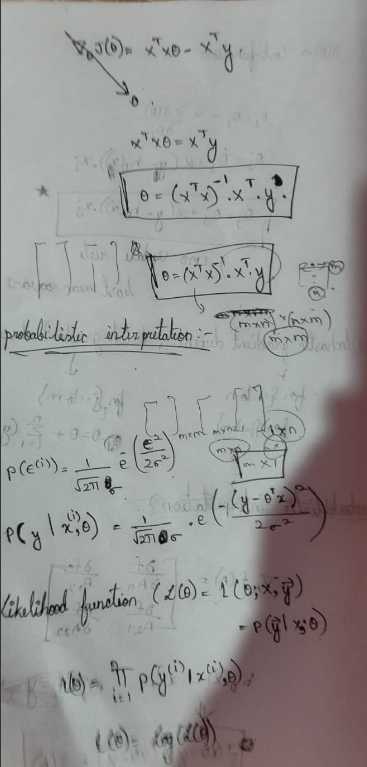
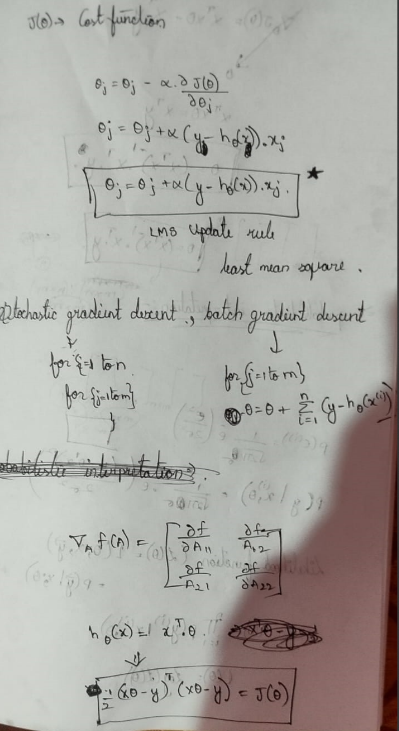

In [2]:
# OLS()->
import numpy as np
from sklearn.datasets import load_diabetes
x,y=load_diabetes(return_X_y=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
print(x.shape,y.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
model=LinearRegression()
model.fit(x_train,y_train)
res=model.predict(x_test)
print(r2_score(y_test,res))
print(model.coef_)
model.intercept_

(442, 10) (442,)
0.4526027629719197
[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


151.34560453985995

In [3]:
#  custom class->
class linear_reg:
    def __init__(self):
        self.coef=None
        self.intercept=None
    def fit(self,X_train:np.ndarray,Y_train:np.ndarray):
        assert X_train.shape[0]==Y_train.shape[0]
        X_train=np.insert(X_train,0,1,axis=1)
        res=np.linalg.inv(np.dot(X_train.T,X_train)).dot(np.dot(X_train.T,Y_train))
        self.intercept=res[0]
        self.coef=res[1:]
    def predict(self,X_test:np.ndarray):
        # assert X_test.shape[1]==self.coef.
        res=self.intercept+np.dot(X_test,self.coef)
        return res
k=linear_reg()
k.fit(x_train,y_train)
res=k.predict(x_test)
print(r2_score(y_test,res))
print(k.coef)
k.intercept

0.45260276297191926
[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


151.34560453985995

# Gradient descent

**Need to Study hyperparameters learning rate and epochs**


-> Batch gradient descent
-> Stochastic gradient descent
-> Mini batch gradient descent

batch -> sum of all the train cases * epochs

stochastic -> iterate all the train cases

mini batch -> stochastic in batches -> x batches * batch size = all train cases

In [4]:
# Batch Gradient descent ->
import time
start=time.time()
class GD_reg:
    def __init__(self,learning_rate=0.5,epochs=100):
        self.coef=None
        self.intercept=None
        self.epochs=epochs
        self.learning_rate=learning_rate
    def fit(self,X_train:np.ndarray,Y_train:np.ndarray):
        self.coef=np.ones(X_train.shape[1])
        self.intercept=0
        for i in range(self.epochs):
            pred=self.intercept+np.dot(X_train,self.coef)
            intercept_der=-2*np.mean(Y_train-pred)
            coef_ders=-2*np.dot((Y_train-pred),X_train)/X_train.shape[0]
            self.intercept=self.intercept-self.learning_rate*intercept_der
            self.coef=self.coef-self.learning_rate*coef_ders
    def predict(self,X_test:np.ndarray):
        assert X_test.shape[1]==self.coef.shape[0]
        return X_test.dot(self.coef) +self.intercept
x=GD_reg(epochs=1000)
x.fit(x_train,y_train)
res=x.predict(x_test)
end=time.time()
print("time taken:",end-start)
print("accuracy:",r2_score(y_test,res))

time taken: 0.0170748233795166
accuracy: 0.4588776166235029


In [11]:
# Stochastic Gradient descent
start=time.time()
class stochastic:
    def __init__(self,learning_rate=0.1,epochs=10) -> None:
        self.coef=None
        self.intercept=None
        self.epochs=epochs
        self.learning_rate=learning_rate
    def fit(self,X_train:np.ndarray,Y_train:np.ndarray):
        self.coef=np.ones(x_train.shape[1])
        self.intercept=0
        for _ in range(self.epochs):
            for i in range(X_train.shape[0]):
                # i=np.random.randint(0,X_train.shape[0])
                pred=self.intercept+X_train[i].dot(self.coef)
                self.intercept=self.intercept+self.learning_rate*(Y_train[i]-pred)
                self.coef=self.coef+self.learning_rate*X_train[i].dot(Y_train[i]-pred)
    def predict(self,x_test:np.ndarray):
        return x_test.dot(self.coef)+self.intercept
t=stochastic()
t.fit(x_train,y_train)
res=t.predict(x_test)
end=time.time()
print("time taken:",end-start)
# print(t.intercept,t.coef)
print("accuracy:",r2_score(y_test,res))

time taken: 0.012708663940429688
accuracy: 0.4033861106154719


# when to use what???

big data,non convex funtions-> stochastic GD

**learn optimising hyperparamters->learning schedules for optimal learning rate**
momentum->
https://www.youtube.com/watch?v=mdKjMPmcWjY&t=86s&ab_channel=CodeEmporium

In [14]:
#SGD regressor in sklearn 
from sklearn.linear_model import SGDRegressor
model=SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)
model.fit(x_train,y_train)
res=model.predict(x_test)
print(r2_score(y_test,res))

0.442233186009217


In [54]:
# Mini batch gradient descent :
class minibatchGD:
    def __init__(self,batch_size=10,learning_rate=0.06,epochs=50) -> None:
        self.coef=None
        self.intercept=None
        # self.ratio=ratio
        self.batch_size=batch_size
        self.learning_rate=learning_rate
        self.epochs=epochs
    def fit(self,X_train:np.ndarray,Y_train:np.ndarray):
        self.intercept=0
        self.coef=np.ones(X_train.shape[1])
        for _ in range(0,self.epochs):
            for _ in range(int(X_train.shape[0]/self.batch_size)):
                idxs=np.random.randint(X_train.shape[0],size=self.batch_size)
                pred=self.intercept+X_train[idxs].dot(self.coef)
                coef_der=-2*(1/self.batch_size)*((Y_train[idxs]-pred).dot(X_train[idxs]))
                intercept_der=-2*np.mean(Y_train[idxs]-pred)
                self.coef-=self.learning_rate*coef_der
                self.intercept-=self.learning_rate*intercept_der
        # for _ in range(self.epochs):
        #     for _ in range(int(1/self.ratio)):
        #         coef_der=np.zeros(X_train.shape[1])
        #         intercept_der=0
        #         for _ in range(int(self.ratio*X_train.shape[0])):
        #             idx=np.random.randint(0,X_train.shape[0])
        #             pred=self.intercept+X_train[idx].dot(self.coef)
        #             coef_der+=X_train[idx]*(Y_train[idx]-pred)
        #             intercept_der+=Y_train[idx]-pred
        #         self.coef=self.coef+self.learning_rate*coef_der*2*self.ratio
        #         self.intercept=self.intercept+self.learning_rate*intercept_der*2*self.ratio
    def predict(self,X_test:np.ndarray):
        return X_test.dot(self.coef)+self.intercept
x=minibatchGD()
x.fit(x_train,y_train)
res=x.predict(x_test)
print(r2_score(y_test,res))

0.4173321013798723


In [63]:
#  in skleanrn use SGD.partial_fit-> epoch=1
p=SGDRegressor(learning_rate='constant',eta0=0.1)
for i in range(500):
    idxs=np.random.randint(x_train.shape[0],size=10)
    p.partial_fit(x_train[idxs],y_train[idxs])
res=p.predict(x_test)
print(r2_score(y_test,res))

0.454195016786766


# Assumptions of Linear Assumptions:

1. Linear Relationshion between input and output.

2. No Multicollinearity.
    -> Since changing in one feature should not effect the weight of other feature's coefficient. 

3. Normality of Residual.
    -> As observed in the probabilistic interpretation the error(residual) 
    is assumed as a normal function.

4. Homoscedasticity
    -> The spread of residuals should be equal along the dataset.
    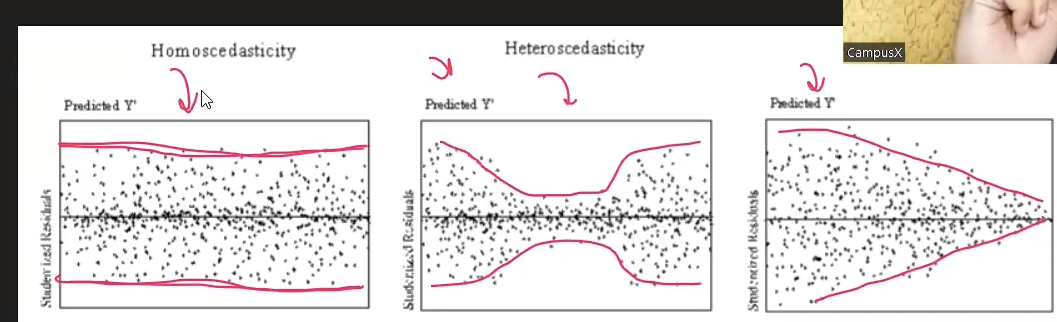

5. No Autocorelation of error.
    -> No pattern in residuals.
    

In [ ]:
# Multicollinearity detection:
# we can use a collinearity heatmap.